# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import json
import requests as req
import random
import seaborn as sns
import math as math
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#import datetime to label the graphs
from datetime import datetime

In [2]:
# Save config information
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"


In [3]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

In [5]:
len(cities)

583

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Initialize data frame to store data from API calls
WeatherData_df =pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date",
                                        "Humidity","Lat","Lng",
                                         "Max Temp", "Wind Speed", 
                                        ])

In [9]:
# count the number of calls to API
count = 1 

# error count to null data values from the api extract
error_count = 0 

#number of call sets
sets = 1 

# index for the data frame
index = 0 

#Get current time
t0 =time.time()

print(f'Beginning Data Retrieval \n _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

for city in cities:
    try:
        # remove space in city name so the URL retrieved is not broken.
        city1 = city.replace(" ", "%20") 
        
        print(f'Processing Record {count} of Set {sets} | {city}' )
        #print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        
        WeatherData_df.set_value(index, "City", city_stats["name"])
        WeatherData_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherData_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherData_df.set_value(index, "Date", city_stats("dt"))
        WeatherData_df.set_value(index, "Humidity", city_stats("main.humidity"))
        WeatherData_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherData_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherData_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherData_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        
        index = index +1 
   
    except:
        print("City not found. Skipping...")
        error_count= error_count+1
    
    count = count+1
    
    if count == 51: # Weather App API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()


print(f'\n _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')
print(f'\n Data Retrieval Complete \n _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')
print(f'\n Could not get data for {error_count} cities')


Beginning Data Retrieval 
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Processing Record 1 of Set 1 | magadan
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | wamba


/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-

Processing Record 4 of Set 1 | kautokeino
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | bougouni
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | hanzhong
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | te kauwhata
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | ravar
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mayo
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | pochutla
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | airai
Processing Record 23 of Set 1 | puerto ayora
Processing Record 24 of Set 1 | kapaa
Processing Record 25 of Set 1 | tuktoyaktuk
Processing Record 26 of Set 1 | arraial do cabo
Processing Record 27 of Set 1 | ok

Processing Record 37 of Set 4 | roebourne
Processing Record 38 of Set 4 | lagoa
Processing Record 39 of Set 4 | polyarnyy
Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | bikramganj
Processing Record 42 of Set 4 | henties bay
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | olavarria
Processing Record 45 of Set 4 | muroto
Processing Record 46 of Set 4 | sucua
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | carauari
Processing Record 49 of Set 4 | agirish
Processing Record 50 of Set 4 | banda aceh
Processing Record 1 of Set 5 | burica
City not found. Skipping...
Processing Record 2 of Set 5 | sao filipe
Processing Record 3 of Set 5 | san carlos de bariloche
Processing Record 4 of Set 5 | tessaoua
Processing Record 5 of Set 5 | aswan
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | amderma
City not found. Skipping...
Processing Record 8 of Set 5 | songkhla
Processing Record 9 of

City not found. Skipping...
Processing Record 26 of Set 8 | owensboro
Processing Record 27 of Set 8 | abha
Processing Record 28 of Set 8 | saint-georges
Processing Record 29 of Set 8 | gat
Processing Record 30 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 31 of Set 8 | joshimath
Processing Record 32 of Set 8 | bembibre
Processing Record 33 of Set 8 | yashan
Processing Record 34 of Set 8 | richards bay
Processing Record 35 of Set 8 | rognan
Processing Record 36 of Set 8 | syracuse
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | huaiyin
Processing Record 39 of Set 8 | ahuimanu
Processing Record 40 of Set 8 | karanpura
Processing Record 41 of Set 8 | mopti
Processing Record 42 of Set 8 | ngunguru
Processing Record 43 of Set 8 | sur
Processing Record 44 of Set 8 | kimbe
Processing Record 45 of Set 8 | yulara
Processing Record 46 of Set 8 | sokoni
Processing Record 47 of Set 8 | kaeo
Processing Record 48 of Set 8 | ambodifototra
City not found. S

Processing Record 5 of Set 12 | port ellen
City not found. Skipping...
Processing Record 6 of Set 12 | hofn
Processing Record 7 of Set 12 | sorong
Processing Record 8 of Set 12 | karaul
City not found. Skipping...
Processing Record 9 of Set 12 | ginir
Processing Record 10 of Set 12 | guozhen
Processing Record 11 of Set 12 | libertador general san martin
Processing Record 12 of Set 12 | san jose
Processing Record 13 of Set 12 | honjo
Processing Record 14 of Set 12 | luena
Processing Record 15 of Set 12 | manga
Processing Record 16 of Set 12 | drumheller
Processing Record 17 of Set 12 | tiarei
Processing Record 18 of Set 12 | sept-iles
Processing Record 19 of Set 12 | mont-dore
Processing Record 20 of Set 12 | cap malheureux
Processing Record 21 of Set 12 | ushibuka
Processing Record 22 of Set 12 | palana
Processing Record 23 of Set 12 | pakaur
Processing Record 24 of Set 12 | marabba
Processing Record 25 of Set 12 | san andres
Processing Record 26 of Set 12 | huangpu
Processing Record 2

In [10]:
WeatherData_df.count()

City          511
Cloudiness    511
Country       511
Date          511
Humidity      511
Lat           511
Lng           511
Max Temp      511
Wind Speed    511
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Export the city data into a .csv.
WeatherData_df.to_csv("WeatherData.csv", encoding='utf-8', index=False)


In [12]:
#Display the DataFrame
WeatherData_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Magadan,100,RU,1559273565,97,59.56,150.8,39.81,2.21
1,Bluff,100,AU,1559273565,26,-23.58,149.07,67.89,14.65
2,Wamba,77,CD,1559273565,94,2.14,27.99,66.45,1.45
3,Kautokeino,21,NO,1559273565,88,69.01,23.04,38.55,8.7
4,Busselton,79,AU,1559273565,30,-33.64,115.35,75,10.8


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

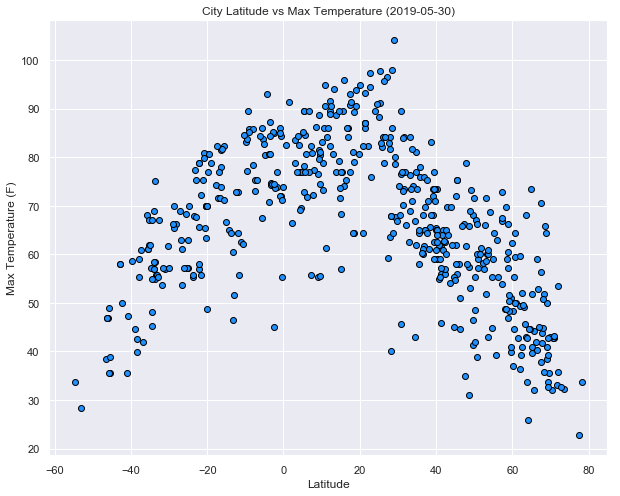

In [13]:
plt.figure(figsize=(10,8))
sns.set()


plt.scatter(WeatherData_df["Lat"], WeatherData_df["Max Temp"], color='dodgerblue',edgecolor='black', alpha=1)

#plt.ylim(20,101)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')

#plt.savefig("../Images/avg_state_rain.png")
plt.savefig("../Images/Latitude_Vs_Temperature.png")
plt.show()
#plt.grid()

#### Latitude vs. Humidity Plot

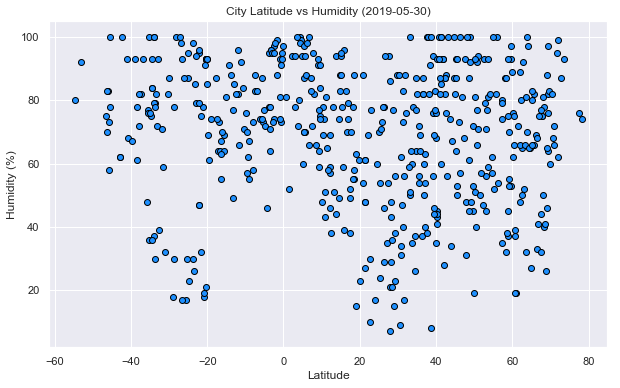

In [14]:
plt.figure(figsize=(10,6))
sns.set()

plt.scatter(WeatherData_df["Lat"], WeatherData_df["Humidity"], color='dodgerblue',edgecolor='black', alpha=1)

plt.ylim(2,105)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')

plt.savefig("../Images/Latitude_Vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

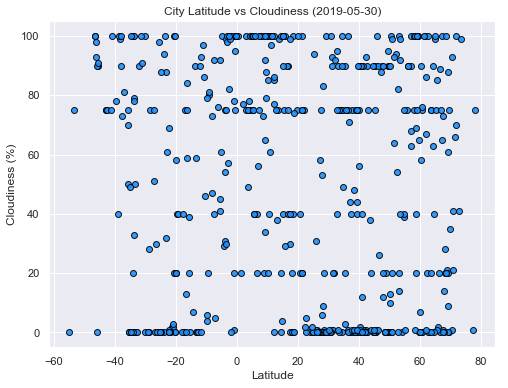

In [15]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherData_df["Lat"], WeatherData_df["Cloudiness"], color='dodgerblue',edgecolor='black', alpha=0.9)

plt.ylim(-5,(WeatherData_df["Cloudiness"].max()+5))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')

plt.savefig("../Images/Latitude_Vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

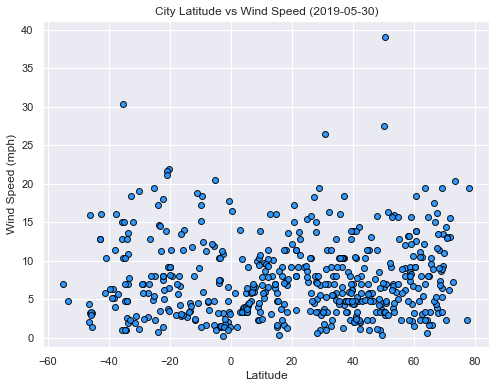

In [16]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherData_df["Lat"], WeatherData_df["Wind Speed"], color='dodgerblue',edgecolor='black', alpha=0.9)

plt.ylim((WeatherData_df["Wind Speed"].min()-1.5),(WeatherData_df["Wind Speed"].max()+2))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')

plt.savefig("../Images/Latitude_Vs_WindSpeed.png")
plt.show()